#Python机器学习
对于某给定的任务T，在合理的性能度量方案P的前提下，某计算机程序可以自主学习任务T的经验E

#1. 算法分类

##1.1 第一种算法分类


###1.1.1 有监督学习
有训练数据集。KNN、决策树、回归等等
- 判别方法：决策树、支持向量机、K近邻、逻辑回归
- 生成方法：朴素贝叶斯、HMM(隐马尔可夫模型)、GMM(高斯混合模型)

判别方法可以告诉测试数据的具体分类，生成方法会告诉测试数据数据任何一个分类的概率

生成模型：无穷样本->概率密度模型->产生模型->预测

判别模型：有限样本->判别函数->预测模型->预测

生成模型更普适、判别模型更直接；生成方法关注数据是如何产生的，寻找的是数据分布模型，判别方法关注数据的差别，寻找的是分类面；由生成模型可以得到判别式模型，但由判别式模型得不到生成式模型


###1.1.2 无监督学习
没有训练数据集。聚类等等


###1.1.3 半监督学习
强化学习。人学走路。


##1.2 第二种分类方法
###1.2.1 分类和回归
预测算法，最终生成一个模型。预测的变量是连续型数据变量，就是回归；如果是离散型的数据变量，那就是分类。
这里所说的变量，是表示类别的应变量，不是表示特征的因变量
- 回归算法：线性回归、广义线性回归
- 分类算法：逻辑回归、支持向量积、决策树

###1.2.2 聚类

###1.2.3 关联分析

###1.2.4 降维


#2 解决问题的框架
定义目标、定义模型、定义损失函数、训练样本、优化。

模型、目标和算法

#3 损失函数和正则化

##3.1 损失函数
- 损失：预测值和真实结果的差异

我们的目标就是使得损失最小，能够标识损失的函数就是损失函数

##3.2 过拟合
在训练数据上表现特别好，但是应用到测试数据上就会特别差。

所以损失最小不是唯一目标，因为这样会导致过拟合

##3.3 偏差与方差
偏差bias:预测值的均值与实际值的差，反应的是模型本身的优劣

方差variance：预测结果本身的方差，反应的事算法性能的优劣
![images](images/01/01.png)

过拟合=低偏差+高方差

##3.4 损失函数的一般形式
结构风险=经验风险+惩罚项(正则化项)

$J(\omega)=\sum_iL(m_i(\omega))+\lambda{R(\omega)}$，其中$m_i$是损失值，对于连续变量，也就是回归问题，损失项可以用预测值和真实值的差值来表示；但是对于离散型的分类问题，损失项不能简单的用差值表示，我们主要讨论分类问题，所以就有$\begin{cases}
m_i=y^{(i)}f_\omega(x^{(i)})\\
y^{(i)} \in \{-1,1\}\\
f_\omega(x^{(i)})=\omega^Tx^{(i)}
\end{cases}$

$L(m_i(\omega))$是最初始的损失函数，也就是真实值与预测值之间的差异，也叫做经验风险；$R(\omega)$是关于回归参数的一个函数，也叫做正则化。对于岭回归，就是参数的平方函数，对于lasso回归，就是参数的绝对值函数；

通常正则化分为两种：L1-参数的平方函数；L2-参数的绝对值函数

L1的效果是使得模型比较简单，可以进行参数选择，还可以避免过拟合；L2只能起到一个避免过拟合的作用

###3.4.1 0~1-Loss
基线，适用于二分类问题；二分类问题一般我们计算的都是P(y=1)的概率，对于P(y=0)的概率，使用的是1-P(y=1)。其实判别方法得到的都是正例的概率，也就是我们最关心的结果。

$L_{01}(m)=\begin{cases}
0 &m \geq 0\\
1 & m \le 0
\end{cases}$

m就是预测结果；当$m \geq 0$的时候，预测$\hat{y}=1$，否则预测$\hat{y}=-1$,数据本来的真实值我们关心的就是$y=1$的正例情况，所以当$m \geq 0$的时候，预测值和真实值没有差距，所以损失函数就是0，如果当$m \le 0$，那么损失函数就是1

###3.4.2 Hinge Loss-折页损失
SVM使用的就是Hinge Loss

$\ell(y)=max(0, 1- t * y)$, y代表数据的真实分类；t代表计算出来的值，也就是m计算出来的值，约束条件为$t(x)=\begin{cases}
1 & m \geq 0\\
-1 & m \le 0
\end{cases}$,$y \in \{-1,1\}$

这是单个样本的损失值，至于整体样本的损失值，为$L(y)=\frac{1}{n}\sum_{i=1}^n\ell(y)$

针对上图，可以看出当$t \geq 1$的时候，$\ell(y)$一直取值0，相当于对于整体的损失是没有影响的。只有当$t \le 1$的时候，才会对整体的损失有影响.

更深入以下，我们可以看到图中，t可以分为3段,分别可以得到三个预测结果。$\hat{y}=\begin{cases}
1 & t \geq 1\\
1 & 0 \leq t \leq 1\\
-1 & t \le 0
\end{cases}$
具体到SVM中，当$t \geq 1$的时候，所对应的就是在支撑平面外面的点，这些点肯定对损失函数是没有任何影响的；当$0 \leq t \leq 1$，所对应的就是支撑平面上的点，这些点必然也是对损失函数没有影响；$t \le 0$对应的就是在支撑平面中间的点，以及完全分错的那些点，只有这些点才会对损失函数有影响

###3.4.3 Log Loss-对数损失
逻辑回归用的就是Log Loss,使用的就是用-1乘以对数似然函数，然后取最小值

$L(w)=-\frac{1}{N}\sum_{n=1}^NH(p_n,q_n)=-\frac{1}{N}\sum_{n=1}^N[y_nlog\hat{y}_n+(1-y_n)log(1-\hat{y}_n)]$,信息论中叫做交叉熵

由上图可知，对于Log Loss来说，所有的样本都会对损失函数有影响。

###3.4.4 Exp Loss-指数Loss
AdaBoost算法使用的就是Exp Loss

###3.4.5 Square Loss
使用的不是很多，$L(y,f(x))=(y-f(x))^2$，因为把0预测成1和把0预测成8，对于0-1损失是一样的，但是对于平方损失是不一样的，这是不合理的

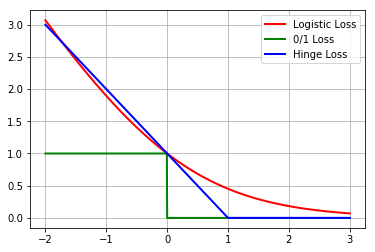

In [1]:
import numpy as np
import matplotlib as mpl
import math
import matplotlib.pyplot as plt
x = np.array(np.linspace(start=-2, stop=3, num=1001, dtype=np.float))
y_logit = np.log(1 + np.exp(-x)) / math.log(2)
y_boost = np.exp(-x)
y_01 = x < 0
y_hinge = 1.0 - x
y_hinge[y_hinge < 0] = 0
plt.plot(x, y_logit, 'r-', label='Logistic Loss', linewidth=2)
plt.plot(x, y_01, 'g-', label='0/1 Loss', linewidth=2)
plt.plot(x, y_hinge, 'b-', label='Hinge Loss', linewidth=2)
# plt.plot(x, y_boost, 'm--', label='Adaboost Loss', linewidth=2)
plt.grid()
plt.legend(loc='upper right')
# plt.savefig('1.png')
plt.show()